In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [46]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)

        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost = cost / m
    return cost

In [47]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        error = f_wb_i - y[i]

        for j in range(n):
            dj_dw[j] += error * X[i][j]

        dj_db += error

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db


In [48]:
def gradient_descent_logistic(X, y, w, b, alpha, iterations):
    cost_history = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost_logistic(X, y, w, b)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, cost_history

In [49]:
df = pd.read_csv(r"C:\Users\Pratheek\Documents\RNC Codes\Task 8\heart.csv")

In [50]:
X = df[['age', 'trestbps', 'chol', 'restecg']].values
y = df['target'].values

In [51]:
X_train = X[:240]
y_train = y[:240]

X_test = X[240:]
y_test = y[240:]

In [52]:
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
sigma[sigma == 0] = 1

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [53]:
w = np.zeros(X_train.shape[1])
b = 0.0

alpha = 0.1
iterations = 2000

In [54]:
w, b, cost_history = gradient_descent_logistic(
    X_train, y_train, w, b, alpha, iterations
)

print("\nTraining completed")
print("Final weights:", w)
print("Final bias:", b)

Iteration 0: Cost = 0.6867992776822109
Iteration 100: Cost = 0.5741801941211958
Iteration 200: Cost = 0.571876904071561
Iteration 300: Cost = 0.5717469387671682
Iteration 400: Cost = 0.5717372539716763
Iteration 500: Cost = 0.571736456658044
Iteration 600: Cost = 0.5717363884926281
Iteration 700: Cost = 0.5717363825768633
Iteration 800: Cost = 0.5717363820602734
Iteration 900: Cost = 0.5717363820150438
Iteration 1000: Cost = 0.5717363820110796
Iteration 1100: Cost = 0.5717363820107317
Iteration 1200: Cost = 0.5717363820107014
Iteration 1300: Cost = 0.5717363820106984
Iteration 1400: Cost = 0.5717363820106982
Iteration 1500: Cost = 0.5717363820106982
Iteration 1600: Cost = 0.5717363820106981
Iteration 1700: Cost = 0.5717363820106984
Iteration 1800: Cost = 0.5717363820106981
Iteration 1900: Cost = 0.5717363820106982

Training completed
Final weights: [-0.39468839 -0.05061178 -0.07086178  0.49361676]
Final bias: 0.8823028509431182


In [65]:
y_pred_prob = sigmoid(np.dot(X_test, w) + b)
y_pred = (y_pred_prob >= 0.5).astype(int)

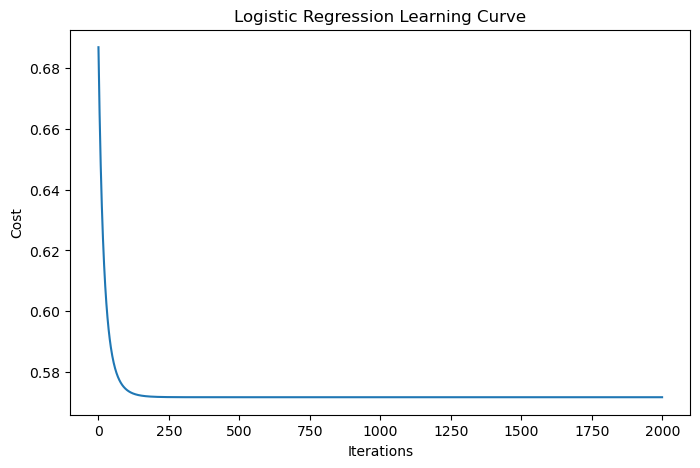

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Logistic Regression Learning Curve")
plt.show()